# Finding and Imputing Missing Variables

This notebook will walk through several methods for imputing missing variables, including mean/median/mode imputation, imputation by linear regression, hot deck imputation, and case deletion. If there's time, I will also explore expectation maximization imputation and Markov Chain Monte Carlo algorithm

First, I need to:
- Read in the data, relevant libraries, and atom file for the code
- Find the missing data
- Determine if the data is missing completeley at random, missing at random, or missing not at random

Note that I've pip intalled the following packages: missingno 

In [383]:
# Importing code file
import missing_data_code as mdc
import importlib
importlib.reload(mdc)

<module 'missing_data_code' from '/Users/mariomoreno/Desktop/ML Projects/Mexico OC/missing_data_code.py'>

In [384]:
# Reading in data
df = mdc.reading_in('data/Mexico_Final.xlsx')

In [385]:
df.head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,NaN,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,NaN,38,2782012


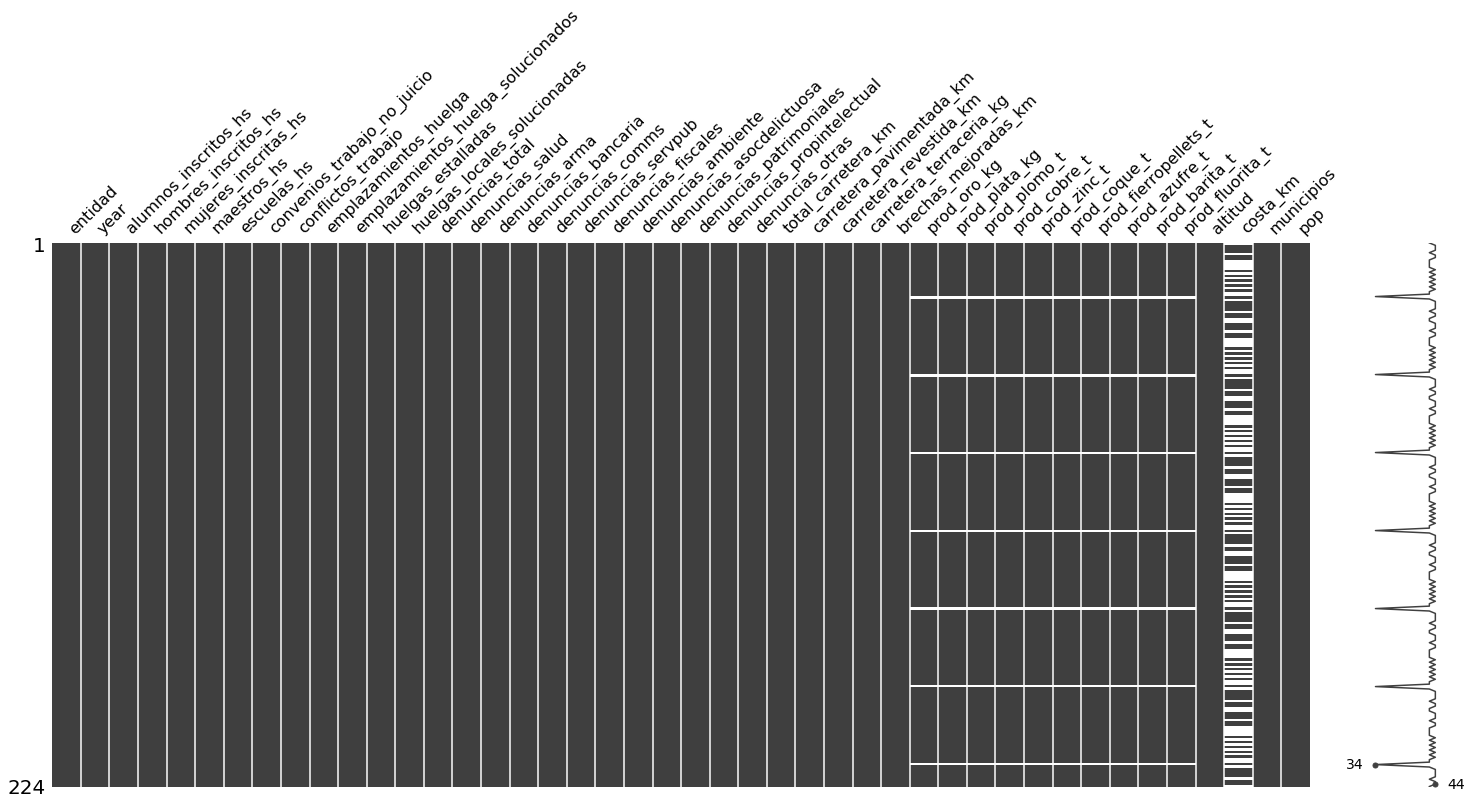

In [386]:
mdc.visualizing_nulls(df, 'nullity')

From this graph, we can see that metal producing and coastline variables have nulls. Interestingly, they both follow uniform patterns so it's likely that the same states have nulls over and over again

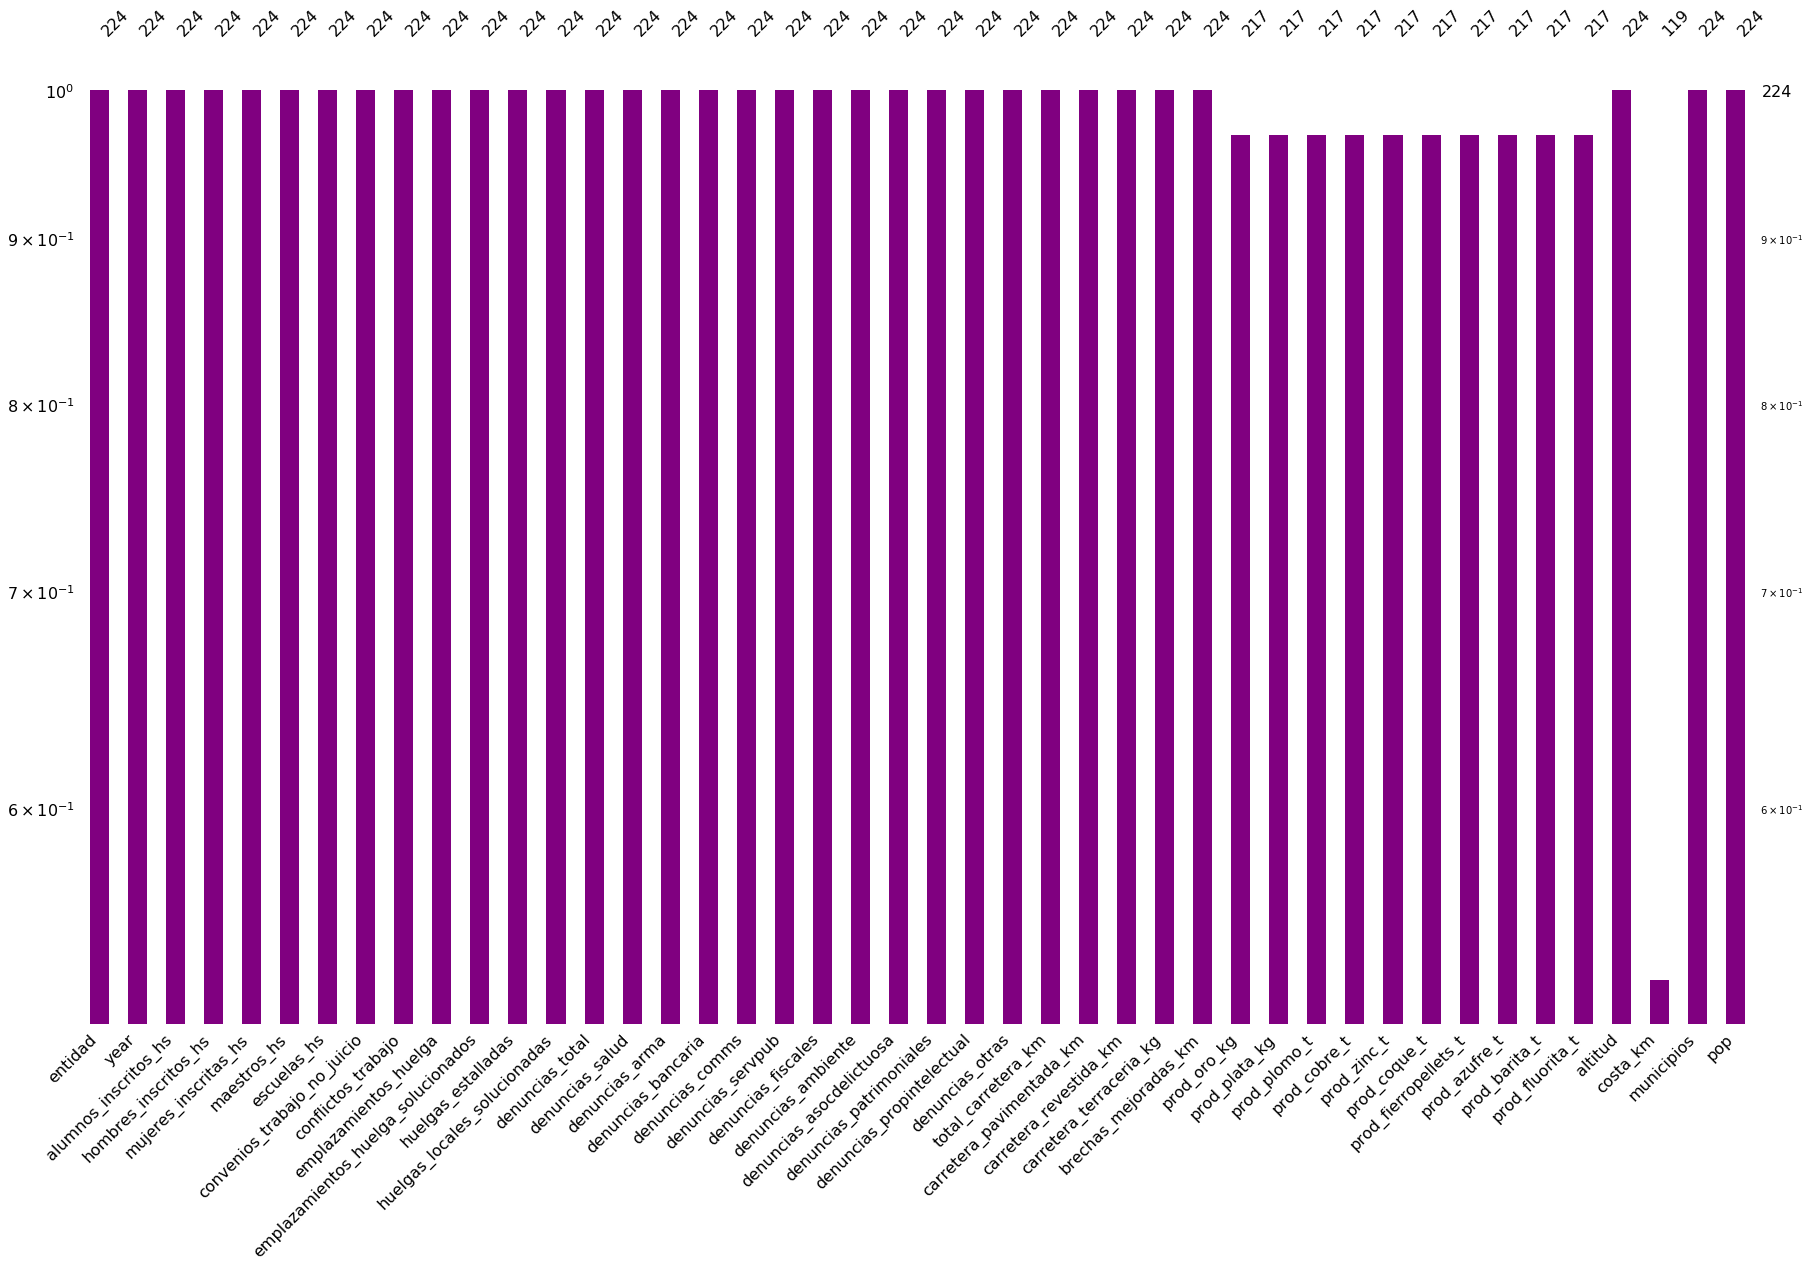

In [387]:
mdc.visualizing_nulls(df, 'bar')

Putting actual number of nulls to the columns -- only seven for the producing metals variables, and more than 100 for coastline

In [388]:
# Finding the nulls
null_cols = mdc.find_missing_cols(df)
null_cols

[('prod_oro_kg', 7),
 ('prod_plata_kg', 7),
 ('prod_plomo_t', 7),
 ('prod_cobre_t', 7),
 ('prod_zinc_t', 7),
 ('prod_coque_t', 7),
 ('prod_fierropellets_t', 7),
 ('prod_azufre_t', 7),
 ('prod_barita_t', 7),
 ('prod_fluorita_t', 7),
 ('costa_km', 105)]

As we can see above, we're missing seven variables for each of the metal producing categories, and 105 variables for coastline. In order to determine if these variables are missing at random, I need to see what states correspond to the missing variables.

In [389]:
# Finding the row, column pairs that have missing values
missing_rows = mdc.find_missing_rows(df, 'entidad', null_cols)
missing_rows

{('Aguascalientes           ', 'costa_km'),
 ('Chihuahua                ', 'costa_km'),
 ('Ciudad de México b/', 'costa_km'),
 ('Coahuila de Zaragoza', 'costa_km'),
 ('Durango                  ', 'costa_km'),
 ('Guanajuato               ', 'costa_km'),
 ('Hidalgo                  ', 'costa_km'),
 ('Morelos                  ', 'costa_km'),
 ('México                   ', 'costa_km'),
 ('Nuevo León               ', 'costa_km'),
 ('Puebla                   ', 'costa_km'),
 ('Querétaro', 'costa_km'),
 ('Quintana Roo             ', 'prod_azufre_t'),
 ('Quintana Roo             ', 'prod_barita_t'),
 ('Quintana Roo             ', 'prod_cobre_t'),
 ('Quintana Roo             ', 'prod_coque_t'),
 ('Quintana Roo             ', 'prod_fierropellets_t'),
 ('Quintana Roo             ', 'prod_fluorita_t'),
 ('Quintana Roo             ', 'prod_oro_kg'),
 ('Quintana Roo             ', 'prod_plata_kg'),
 ('Quintana Roo             ', 'prod_plomo_t'),
 ('Quintana Roo             ', 'prod_zinc_t'),
 ('San 

From the set of states that have nulls for the variable costa_km, it seems that they're all land-locked states. While these values are missing at random, it'll be appropriate to impute them with a zero.

From the set of states that have nulls for metal production, the only one is Quintana Roo. It's unlikely that Quintana Roo does not produce any metals -- indeed, there are states with values of zero in those columns. As to why they're missing, it's unlikely that they're related to our ultimate aim of measuring presence of organized crime so we'll impute them using the methods below. 

But first, to impute missing coastline variables with zeroes.

### 1) Zero Imputation 

In [390]:
# Imputing zeroes for missing variables in costa_km column
mdc.impute_zero(df, {'costa_km':0})
df.isnull().sum()

entidad                               0
year                                  0
alumnos_inscritos_hs                  0
hombres_inscritos_hs                  0
mujeres_inscritas_hs                  0
maestros_hs                           0
escuelas_hs                           0
convenios_trabajo_no_juicio           0
conflictos_trabajo                    0
emplazamientos_huelga                 0
emplazamientos_huelga_solucionados    0
huelgas_estalladas                    0
huelgas_locales_solucionadas          0
denuncias_total                       0
denuncias_salud                       0
denuncias_arma                        0
denuncias_bancaria                    0
denuncias_comms                       0
denuncias_servpub                     0
denuncias_fiscales                    0
denuncias_ambiente                    0
denuncias_asocdelictuosa              0
denuncias_patrimoniales               0
denuncias_propintelectual             0
denuncias_otras                       0


In [391]:
df.head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


The array and dataframe above shows that we've successfully imputed all missing values for coast_km with zeroes. Next, it's time to explore different imputation methods for the missing metals for Queretaro.

### 2) Case Deletion 

Just to track the shape of our database over time and make sure deletion is working, it's important to note that it's 224 rows and 44 columns. 

In [392]:
df.shape

(224, 44)

With that done, time to delete. We'll start with deleting the rows that have nulls (in this case, all the Quintana Roo entries). We should expect our row number (224) to decrease by seven to 217

In [393]:
deleted_rows = mdc.case_deletion(df, 'row')
deleted_rows.shape

(217, 44)

In [394]:
deleted_rows.head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


Now we'll try deleting the columns that have nulls (in this case, all the metals). We should expect our column number (46) to decrease by ten to 36.

In [395]:
deleted_columns = mdc.case_deletion(df, 'column')
deleted_columns.shape

(224, 34)

In [396]:
deleted_columns.columns

Index(['entidad', 'year', 'alumnos_inscritos_hs', 'hombres_inscritos_hs',
       'mujeres_inscritas_hs', 'maestros_hs', 'escuelas_hs',
       'convenios_trabajo_no_juicio', 'conflictos_trabajo',
       'emplazamientos_huelga', 'emplazamientos_huelga_solucionados',
       'huelgas_estalladas', 'huelgas_locales_solucionadas', 'denuncias_total',
       'denuncias_salud', 'denuncias_arma', 'denuncias_bancaria',
       'denuncias_comms', 'denuncias_servpub', 'denuncias_fiscales',
       'denuncias_ambiente', 'denuncias_asocdelictuosa',
       'denuncias_patrimoniales', 'denuncias_propintelectual',
       'denuncias_otras', 'total_carretera_km', 'carretera_pavimentada_km',
       'carretera_revestida_km', 'carretera_terraceria_kg',
       'brechas_mejoradas_km', 'altitud', 'costa_km', 'municipios', 'pop'],
      dtype='object')

Pretty straightforward. We now have two dataframes:
- deleted_rows is the dataframe with all the rows with missing values deleted
- deleted_columns in the dataframe with all the columns with missing values deleted

There is a rule of thumb in deleting rows or columns as a way to deal with missing values: **if a variable has more than 5% of it's values missing, do not delete**

While our current example meets the parameters of the rule of thumb, it's important to note that this is not the ideal way to deal with missing values, particularly in an index such as this.

That's why I'll now go through other forms of imputing missing variables. Starting with median imputation.

### 3) Median Imputation 

We'll go back to using our original dataframe, but first I need the columns that need to be imputed since it's an argument in the function that's been written. I'll need to read it in again for each example since I'm having trouble making changes not in place.

In [397]:
df = mdc.reading_in('data/Mexico_Final.xlsx')
mdc.impute_zero(df, {'costa_km':0}).head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


In [398]:
cols = mdc.find_missing_cols(df)
cols

[('prod_oro_kg', 7),
 ('prod_plata_kg', 7),
 ('prod_plomo_t', 7),
 ('prod_cobre_t', 7),
 ('prod_zinc_t', 7),
 ('prod_coque_t', 7),
 ('prod_fierropellets_t', 7),
 ('prod_azufre_t', 7),
 ('prod_barita_t', 7),
 ('prod_fluorita_t', 7)]

In [399]:
# loop to pull out the missing columns from the list above
cols_impute = []
for c in cols:
    cols_impute.append(c[0])
cols_impute

['prod_oro_kg',
 'prod_plata_kg',
 'prod_plomo_t',
 'prod_cobre_t',
 'prod_zinc_t',
 'prod_coque_t',
 'prod_fierropellets_t',
 'prod_azufre_t',
 'prod_barita_t',
 'prod_fluorita_t']

Ok, now we're ready to begin.

In [400]:
df['prod_oro_kg'].value_counts()

0.0        139
1079.6       2
1216.9       2
1321.5       2
783.1        2
1248.8       2
1201.5       2
861.1        2
19490.4      1
11186.8      1
3060.6       1
416.1        1
11380.8      1
1210.3       1
9480.1       1
23516.2      1
555.1        1
800.5        1
4794.5       1
1193.2       1
7992.2       1
17000.2      1
3224.9       1
4482.0       1
12252.5      1
37160.3      1
1786.7       1
3119.3       1
19715.6      1
20636.0      1
          ... 
124.3        1
1631.9       1
27178.4      1
49434.7      1
12338.9      1
27560.2      1
4428.0       1
1523.9       1
30002.9      1
47412.3      1
34926.0      1
12836.7      1
19871.0      1
5619.0       1
2367.3       1
7519.0       1
15297.8      1
423.2        1
2885.7       1
18073.9      1
3053.0       1
13250.5      1
2374.2       1
15944.2      1
10219.8      1
1638.2       1
11136.1      1
15262.3      1
5357.4       1
8550.9       1
Name: prod_oro_kg, Length: 72, dtype: int64

In [401]:
median_df = mdc.single_imputation(df, 'median', cols_impute)

In [402]:
median_df['prod_oro_kg'].value_counts()

0.0        146
1079.6       2
1216.9       2
1321.5       2
783.1        2
1248.8       2
1201.5       2
861.1        2
19490.4      1
11186.8      1
3060.6       1
416.1        1
11380.8      1
1210.3       1
9480.1       1
23516.2      1
555.1        1
800.5        1
4794.5       1
1193.2       1
7992.2       1
17000.2      1
3224.9       1
4482.0       1
12252.5      1
37160.3      1
1786.7       1
3119.3       1
19715.6      1
20636.0      1
          ... 
124.3        1
1631.9       1
27178.4      1
49434.7      1
12338.9      1
27560.2      1
4428.0       1
1523.9       1
30002.9      1
47412.3      1
34926.0      1
12836.7      1
19871.0      1
5619.0       1
2367.3       1
7519.0       1
15297.8      1
423.2        1
2885.7       1
18073.9      1
3053.0       1
13250.5      1
2374.2       1
15944.2      1
10219.8      1
1638.2       1
11136.1      1
15262.3      1
5357.4       1
8550.9       1
Name: prod_oro_kg, Length: 72, dtype: int64

It appears from the above that this worked, but that the median in all of these variables was zero. Therefore, doing a median imputation in this case gave us the same result a zero imputation would have given us. It's not a bad thing, but it is something to consider. 

It might be better to do the median by year. 

### 4) Mean Imputation 

We will now try mean imputation, bearing in mind that it's often best practice to remove the two extremes. However, in this case, given the preponderance of zeroes, I'll keep all observations in.

In [403]:
df = mdc.reading_in('data/Mexico_Final.xlsx')
mdc.impute_zero(df, {'costa_km':0}).head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


In [404]:
df['prod_plata_kg'].value_counts()

0.0          131
238844.0       2
181389.0       2
158731.0       2
164090.0       2
211209.0       2
230071.0       2
212832.0       2
2364199.0      1
2502055.0      1
2028766.0      1
49959.0        1
31732.0        1
114925.0       1
131161.0       1
2222538.0      1
755195.0       1
649054.0       1
455208.0       1
159510.0       1
72372.0        1
41313.0        1
356393.0       1
59268.0        1
122602.0       1
48623.0        1
155201.0       1
778757.0       1
153902.0       1
55377.0        1
            ... 
172918.0       1
179895.0       1
667140.0       1
783081.0       1
134452.0       1
61743.0        1
987124.0       1
2333653.0      1
71103.0        1
52892.0        1
815561.0       1
964806.0       1
48661.0        1
382690.0       1
237601.0       1
1031303.0      1
162084.0       1
750995.0       1
175536.0       1
325325.0       1
58597.0        1
32493.0        1
428242.0       1
144890.0       1
2208359.0      1
174716.0       1
127575.0       1
175855.0      

In [405]:
mean_df = mdc.single_imputation(df, 'mean', cols_impute)

In [406]:
mean_df['prod_plata_kg'].value_counts()

0.000000e+00    131
1.716401e+05      7
1.640900e+05      2
2.112090e+05      2
1.587310e+05      2
1.813890e+05      2
2.300710e+05      2
2.128320e+05      2
2.388440e+05      2
1.344520e+05      1
4.552080e+05      1
4.862300e+04      1
1.226020e+05      1
3.173200e+04      1
3.563930e+05      1
4.131300e+04      1
7.237200e+04      1
1.595100e+05      1
6.490540e+05      1
1.415210e+05      1
7.551950e+05      1
1.311610e+05      1
1.149250e+05      1
2.502055e+06      1
2.364199e+06      1
2.028766e+06      1
5.926800e+04      1
4.782800e+04      1
2.222538e+06      1
5.289200e+04      1
               ... 
5.418960e+05      1
8.155610e+05      1
9.737710e+05      1
5.114900e+04      1
1.275750e+05      1
7.275050e+05      1
3.594030e+05      1
1.729180e+05      1
1.798950e+05      1
6.174300e+04      1
6.671400e+05      1
1.758550e+05      1
1.747160e+05      1
8.578500e+04      1
7.509950e+05      1
7.942380e+05      1
4.781500e+04      1
4.866100e+04      1
2.376010e+05      1


In [407]:
mean_df.head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


This works, it imputed all the missing values for silver production in Quintana Roo with the mean of that columns. However, given time differences. It might be worth doing this by year...as in, you take the mean of the year itself in order to compute. Worth exploring down the road

### 5) Mode Imputation

In [408]:
df = mdc.reading_in('data/Mexico_Final.xlsx')
mdc.impute_zero(df, {'costa_km':0}).head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


In [333]:
df['prod_oro_kg'].value_counts()

0.0        139
1079.6       2
1216.9       2
1321.5       2
783.1        2
1248.8       2
1201.5       2
861.1        2
19490.4      1
11186.8      1
3060.6       1
416.1        1
11380.8      1
1210.3       1
9480.1       1
23516.2      1
555.1        1
800.5        1
4794.5       1
1193.2       1
7992.2       1
17000.2      1
3224.9       1
4482.0       1
12252.5      1
37160.3      1
1786.7       1
3119.3       1
19715.6      1
20636.0      1
          ... 
124.3        1
1631.9       1
27178.4      1
49434.7      1
12338.9      1
27560.2      1
4428.0       1
1523.9       1
30002.9      1
47412.3      1
34926.0      1
12836.7      1
19871.0      1
5619.0       1
2367.3       1
7519.0       1
15297.8      1
423.2        1
2885.7       1
18073.9      1
3053.0       1
13250.5      1
2374.2       1
15944.2      1
10219.8      1
1638.2       1
11136.1      1
15262.3      1
5357.4       1
8550.9       1
Name: prod_oro_kg, Length: 72, dtype: int64

In [409]:
mode_df = mdc.single_imputation(df, 'mode', cols_impute)

In [410]:
mode_df['prod_oro_kg'].value_counts()

0.0        146
1079.6       2
1216.9       2
1321.5       2
783.1        2
1248.8       2
1201.5       2
861.1        2
19490.4      1
11186.8      1
3060.6       1
416.1        1
11380.8      1
1210.3       1
9480.1       1
23516.2      1
555.1        1
800.5        1
4794.5       1
1193.2       1
7992.2       1
17000.2      1
3224.9       1
4482.0       1
12252.5      1
37160.3      1
1786.7       1
3119.3       1
19715.6      1
20636.0      1
          ... 
124.3        1
1631.9       1
27178.4      1
49434.7      1
12338.9      1
27560.2      1
4428.0       1
1523.9       1
30002.9      1
47412.3      1
34926.0      1
12836.7      1
19871.0      1
5619.0       1
2367.3       1
7519.0       1
15297.8      1
423.2        1
2885.7       1
18073.9      1
3053.0       1
13250.5      1
2374.2       1
15944.2      1
10219.8      1
1638.2       1
11136.1      1
15262.3      1
5357.4       1
8550.9       1
Name: prod_oro_kg, Length: 72, dtype: int64

In [411]:
mode_df.head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


Once again, zero seems to be the predominant value in all of these columns so mode imputation results in the equivalent to zero imputation.

Again, it might be worth doing all of this by year, but I will do so at the end.

### 5) Regression Imputation

Regression imputation determines the missing value by running a linear regression on all the values in the respective row as independent variables, as the missing value as the dependent variable.

In [412]:
df = mdc.reading_in('data/Mexico_Final.xlsx')
mdc.impute_zero(df, {'costa_km':0}).head()

,entidad,year,alumnos_inscritos_hs,hombres_inscritos_hs,mujeres_inscritas_hs,maestros_hs,escuelas_hs,convenios_trabajo_no_juicio,conflictos_trabajo,emplazamientos_huelga,...,prod_zinc_t,prod_coque_t,prod_fierropellets_t,prod_azufre_t,prod_barita_t,prod_fluorita_t,altitud,costa_km,municipios,pop
0,Aguascalientes,2010,40129,19250,20879,2727,144,2698,3239,325,...,0.0,0.0,3883423.0,0.0,0.0,0.0,1870,0.0,11,1195787
1,Baja California,2010,107624,53692,53932,6192,271,2342,9353,3241,...,0.0,0.0,3883423.0,0.0,0.0,0.0,3,1493.0,5,3224843
2,Baja California Sur,2010,23247,11780,11467,1588,76,1255,1660,296,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,2131.0,5,649616
3,Campeche,2010,28350,14349,14001,1975,106,3373,1179,144,...,0.0,0.0,3883423.0,0.0,0.0,0.0,10,425.0,11,836747
4,Coahuila de Zaragoza,2010,82553,41397,41156,6219,330,23331,7867,545,...,0.0,1648709.0,2567865.0,0.0,22161.0,121833.0,1700,0.0,38,2782012


In order to do an accurate linear regression, I'll need to divide into train, test splits in order to keep this as rigorous as possible. In this case, here's what they will be:
- x_train = dataframe without metals features and without Quintana Roo
- y_train = a for loop through a list of metal features, where each y_train is one of those features without Quintana Roo
- x_test = dataframe of just Quintana Roo without the metal features
- y_test = a for loop through a list of metal features, where each y_test is one of those features only for Quintana Roo

In [413]:
cols_impute

['prod_oro_kg',
 'prod_plata_kg',
 'prod_plomo_t',
 'prod_cobre_t',
 'prod_zinc_t',
 'prod_coque_t',
 'prod_fierropellets_t',
 'prod_azufre_t',
 'prod_barita_t',
 'prod_fluorita_t']

First I'll need to create two base dataframes: a base dataframe that is only Quintana Roo rows and one that's everything else

In [414]:
train = mdc.case_deletion(df, 'row')
train['entidad'].value_counts()

Ciudad de México b/                 7
Hidalgo                             7
Baja California                     7
Puebla                              7
Tlaxcala                            7
Zacatecas                           7
San Luis Potosí                     7
Jalisco                             7
Chiapas                             7
Coahuila de Zaragoza                7
Morelos                             7
Guanajuato                          7
Chihuahua                           7
Nayarit                             7
Querétaro                           7
Oaxaca                              7
Tamaulipas                          7
Nuevo León                          7
Tabasco                             7
México                              7
Baja California Sur                 7
Durango                             7
Michoacán de Ocampo                 7
Guerrero                            7
Sinaloa                             7
Aguascalientes                      7
Colima      

In [415]:
test = df[df.isnull().any(1)]
test['entidad'].value_counts()

Quintana Roo                 7
Name: entidad, dtype: int64

In [416]:
x_train = train.drop(cols_impute, axis = 1)
x_train.shape

(217, 34)

In [417]:
y_train = train[cols_impute]
y_train.shape

(217, 10)

In [430]:
x_test = test.drop(cols_impute, axis=1)
x_test.shape

(7, 34)

In [419]:
y_test = test[cols_impute]
y_test.shape

(7, 10)

In [420]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [421]:
x_train.dtypes

entidad                                object
year                                    int64
alumnos_inscritos_hs                    int64
hombres_inscritos_hs                    int64
mujeres_inscritas_hs                    int64
maestros_hs                             int64
escuelas_hs                             int64
convenios_trabajo_no_juicio             int64
conflictos_trabajo                      int64
emplazamientos_huelga                   int64
emplazamientos_huelga_solucionados      int64
huelgas_estalladas                      int64
huelgas_locales_solucionadas            int64
denuncias_total                         int64
denuncias_salud                         int64
denuncias_arma                          int64
denuncias_bancaria                      int64
denuncias_comms                         int64
denuncias_servpub                       int64
denuncias_fiscales                      int64
denuncias_ambiente                      int64
denuncias_asocdelictuosa          

In [434]:
store_train = {}
for col in y_train:
    new_df = y_train[col]
    regr = linear_model.LinearRegression()
    x = regr.fit(x_train.drop('entidad', axis=1), new_df)
    y_pred = regr.predict(x_test.drop('entidad', axis=1))
    store_train[col] = y_pred
    print('Coefficients: \n', regr.coef_)


Coefficients: 
 [  6.04193770e+02   5.92709238e-02  -1.37303495e-02   7.30012707e-02
  -6.44201659e-01  -1.68694004e+01   3.25335896e-01  -7.21676348e-01
  -1.43205136e+00   2.97962515e+00   1.11053248e+02  -3.08269624e+01
   1.39253750e+01  -1.42982287e+01  -1.49849470e+01  -1.18272581e+01
  -2.50476462e+01  -7.10656085e+00  -1.74001145e+00  -6.88694125e+01
  -2.78415453e+01  -1.45542425e+01  -2.02244956e+01  -1.35236648e+01
   6.04754578e-01   9.97672217e-01  -6.66184546e-01   2.31617659e-01
   4.16492488e-02   5.29207139e+00   3.32192810e+00  -1.36096068e+00
   1.32494477e-05]
Coefficients: 
 [  3.45325723e+04  -3.13924471e-01  -6.46693252e+00   6.15300786e+00
  -1.01016693e+01  -6.26071708e+02  -8.66989051e+00  -6.13077388e+00
   1.14335807e+02  -6.65538548e+01   8.78731666e+03   1.07558321e+03
   4.91815424e+02  -5.14720943e+02  -7.17451151e+02  -2.63793549e+01
  -1.64228644e+03  -4.59599969e+02  -1.44018973e+02  -3.92026839e+03
  -8.80546380e+02  -3.90499734e+02  -1.14539714e+03 

In [433]:
store_train

{'prod_azufre_t': array([ 58855.94468079,  49180.44119059,  50859.13202389,  44701.08166864,
         37545.81167885,  23198.13194996,  21947.59234646]),
 'prod_barita_t': array([  3693.3409198 ,    -54.04454539,   3816.30149754,  -6638.51856482,
          2097.35550835,  -7663.73307431, -10158.60472596]),
 'prod_cobre_t': array([-33624.77524128, -32251.26895424, -10846.00064225, -26987.4413187 ,
        -19532.60590416, -44952.58721845, -34379.13427039]),
 'prod_coque_t': array([-130492.66492175,  -36782.64331302,  -67757.88624667,
        -106764.36321936,  -21937.15653546,  -38830.51129908,
         -22767.6330766 ]),
 'prod_fierropellets_t': array([ 3059802.68019465,  3293236.00801656,  3169135.63349891,
         3449022.83897305,  3339747.83956286,  3568040.9159117 ,
         3643499.72213051]),
 'prod_fluorita_t': array([-31597.58125946,  -1776.72674507,   2413.04139235,  -3749.86372779,
         12913.38224158,   7570.31654801,  25589.96020304]),
 'prod_oro_kg': array([-6321.845